# Libraries

In [18]:
pip install PyYAML==3.12

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 253 kB 14.5 MB/s eta 0:00:01
  Created wheel for PyYAML: filename=PyYAML-3.12-cp38-cp38-linux_x86_64.whl size=43056 sha256=52e58a3140467bb85ec79b15c8a481807807c25b85de79069bbe15515c1c4862
  Stored in directory: /home/dbennour/.cache/pip/wheels/31/8d/c5/0365d01041ade02f8cfd79c457267cc4f02bb77afcc1adaa5d
Successfully built PyYAML
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pytorch-lightning 1.1.8 requires PyYAML!=5.4.*,>=5.1, but you'll have pyyaml 3.12 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [1]:
%matplotlib inline
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)
import os
import sys 
import pickle as pk
import  pickle
from datetime import datetime
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
#import nctoolkit as ncµ
import netCDF4 as nc4
import threading
import datetime as dt  # Python standard library datetime  module
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xbatcher as xb

import imageio
os.environ['PROJ_LIB'] = '/opt/python3-anaconda50-5.0.1-7ipsl.el6/share/proj'


from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from skimage.measure import block_reduce
from keras import callbacks as cbks



TensorFlow version:  2.2.0


In [2]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import History 

In [3]:
#reload support file 
import sys
import os
py_file_location = "/home/dbennour/DeepPV/"
sys.path.append(os.path.abspath(py_file_location))
import read_cloudalbedo_files, cloud_index_functions, write_cloud_index_files
import PV_Generator
py_file_location = "/home/dbennour/DeepPV/Unet_models/"
sys.path.append(os.path.abspath(py_file_location))
import UNet_model
from read_cloudalbedo_files import *
from PV_Generator import PV_DataGenerator
from UNet_model import *
import importlib
importlib.reload(read_cloudalbedo_files)
importlib.reload(PV_Generator)
importlib.reload(UNet_model)
# type(AECNN_model)
# importlib.reload(write_cloud_index_files)

<module 'UNet_model' from '/home/dbennour/DeepPV/Unet_models/UNet_model.py'>

# Load AECNN

In [4]:
path='/home/dbennour/DeepPV/AECNN_Model/'
aecnn=loadModel("AECNN_v4_2",path)

Yaml Model  AECNN_v4_2 .yaml loaded 
Weights  AECNN_v4_2 .h5 loaded 


# Model 2: CMV prediction

In [5]:
X_train, Y_train=generate_data(0,250,'train_data')
X_val,Y_val=generate_data(0,100,'val_data')
X_test,Y_test=generate_data(0,50,'test_data')

In [6]:
# data_path='/homedata/dbennour/DeepPV/CAL_CMV_slot/'
data_path='/bdd/pegase/DEEPPV/CAL_CMV_slot/'
data_generator_train = PV_DataGenerator('train_data', data_path,to_fit=True,batch_size=16,model=aecnn)
data_generator_val=PV_DataGenerator('val_data', data_path,to_fit=True,batch_size=16,model=aecnn)
data_generator_test=PV_DataGenerator('test_data', data_path,to_fit=False,batch_size=16,model=aecnn)

## U-Net

In [6]:
n_filters = 10
dropout = 0
batchnorm = True
input_img = Input((513, 513, 3,1))
c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 4, batchnorm = batchnorm)
p1 =  MaxPooling3D((3, 3,3), padding = 'same')(c1)
p1 = Dropout(dropout)(p1)


c2 = conv2d_block(p1, n_filters * 2, kernel_size = 4, batchnorm = batchnorm)
p2 = MaxPooling3D((3, 3,3), padding = 'same')(c2)
p2 = Dropout(dropout)(p2)

# c3 = conv2d_block(p2, n_filters * 4, kernel_size = 4, batchnorm = batchnorm)
# p3 = MaxPooling3D((3, 3,3), padding = 'same')(c3)
# p3 = Dropout(dropout)(p3)

# c4 = conv2d_block(p3, n_filters * 8, kernel_size = 4, batchnorm = batchnorm)
# p4 = MaxPooling3D((3, 3,1), padding = 'same')(c4)
# p4 = Dropout(dropout)(p4)

c5 = conv2d_block(p2, n_filters = n_filters * 8, kernel_size = 4, batchnorm = batchnorm)

# Expansive Path
# u6 = Conv3DTranspose(n_filters * 8, (4, 4,4), strides = (3, 3,1), padding = 'same')(c5)
# u6=Cropping3D(cropping=((2, 0), (2, 0),(0,0)), data_format=None)(u6)

# u6 = concatenate([u6, c4])
# u6 = Dropout(dropout)(u6)
# c6 = conv2d_block(u6, n_filters * 8, kernel_size = 4, batchnorm = batchnorm)

# u7 = Conv3DTranspose(n_filters * 4, (4, 4,4), strides = (3, 3,1), padding = 'same')(c5)
# # u7=Cropping3D(cropping=((0, 0), (2, 0),(0,0)), data_format=None)(u7)

# u7 = concatenate([u7, c3])
# u7 = Dropout(dropout)(u7)
# c7 = conv2d_block(u7, n_filters * 4, kernel_size = 4, batchnorm = batchnorm)

u8 = Conv3DTranspose(n_filters * 2, (4, 4,4), strides = (3, 3,1), padding = 'same')(c5)
# u8=Cropping3D(cropping=((2, 0), (2, 0),(0,0)), data_format=None)(u8)

u8 = concatenate([u8, c2])
u8 = Dropout(dropout)(u8)
c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

u9 = Conv3DTranspose(n_filters * 1, (4, 4,4), strides = (3, 3,3), padding = 'same')(c8)
# u9=Cropping3D(cropping=((2, 0), (2, 0),(0,0)), data_format=None)(u9)

u9 = concatenate([u9, c1])
u9 = Dropout(dropout)(u9)
c9 = conv2d_block(u9, n_filters * 1, kernel_size = 4, batchnorm = batchnorm)
c10 = conv2d_block(c9, n_filters * 1, kernel_size = 4, batchnorm = batchnorm)
# c11 = Conv3D(2, (1, 1,2), padding='same')(c10)
# c11 = Conv3D(2, (1, 1,2), padding='same')(c11)
c11 = Conv3D(2, (1, 1,2))(c10)
c11=(LeakyReLU(alpha=0.1))(c11)

c12 = Dense(32)(c11)
#     c11=Dense(10)(c10)
outputs = Conv3D(1, (1, 1,1), activation='sigmoid',kernel_regularizer=l2(0.02))(c12)
    # outputs = Conv3D(1, (1, 1,1), activation='sigmoid',kernel_regularizer=l2(0.02))(c2)
# model = Model(inputs=[input_img], outputs=[outputs])
# model.summary()
model = Model(inputs=[input_img], outputs=[outputs])
adam=Adam(clipnorm=0.9)
adadelta=Adadelta(clipvalue=0.5)
sgd=SGD(momentum=0.9, nesterov=True,clipnorm=1)
model.compile(optimizer=adam, loss=weightedLoss(0.2), metrics=[root_mean_squared_error,'mse','mae',R2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 513, 513, 3, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 513, 513, 3,  650         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 513, 513, 3,  40          conv3d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 513, 513, 3,  0           batch_normalization_1[0][0]      
______________________________________________________________________________________________

In [10]:
model=Unet_build()

In [ ]:
model.summary()

In [8]:
# # To resume training
# from tensorflow.keras.models import model_from_yaml
# from tensorflow.keras.callbacks import *
# results_dir='/net/nfs/ssd1/dbennour/Resultats_ModelPV/'
# callbacks = [ EarlyStopping(patience=10, verbose=1),
#               ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
#               cbks.ModelCheckpoint(results_dir+'Unet-weights.h5', 
#                                    monitor='val_loss', save_best_only=True),
#               TensorBoard(log_dir='/home/dbennour/tmp/Unet')]
# if results_dir is not None:
#     # Load model:
#     with open('/home/dbennour/DeepPV/Unet_models/Unet_v1_2.yaml',"r") as yaml_file:
#         model = model_from_yaml(yaml_file.read())
#     model.load_weights(results_dir+'Unet-weights.h5')
#     # Finding the epoch index from which we are resuming
# #     initial_epoch = get_init_epoch(results_dir)
# #     # Calculating the correct value of count
# #     count = initial_epoch*batches_per_epoch
# #     # Update the value of count in callback instance
# #     callbacks[1].count = count
# else:
#     model = build_model_func()
#     initial_epoch = 0
# sgd=SGD(momentum=0.9, nesterov=False)
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=['mse',R2])

In [9]:
# # To resume training

# history=model.fit(data_generator_train,initial_epoch=6,epochs=10, callbacks=callbacks,validation_data=data_generator_val)

In [ ]:
results_dir='/net/nfs/ssd1/dbennour/Resultats_ModelPV/'
callbacks = [ EarlyStopping(patience=10, verbose=1),
              ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=1),
              cbks.ModelCheckpoint(results_dir+'Unet-weights.h5', 
                                   monitor='val_loss', save_best_only=True),
              TensorBoard(log_dir='/home/dbennour/tmp/Unet')]
history=model.fit(X_train,Y_train,epochs=50, callbacks=callbacks,validation_data=(X_val,Y_val),batch_size=16)

Epoch 1/50
16/16 [==============================] - 89s 6s/step - loss: 0.4496 - root_mean_squared_error: 0.4068 - mse: 0.1658 - mae: 0.3699 - R2: 0.0625 - val_loss: 0.5036 - val_root_mean_squared_error: 0.4698 - val_mse: 0.2159 - val_mae: 0.4109 - val_R2: -0.3386 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 27s 2s/step - loss: 0.4314 - root_mean_squared_error: 0.3924 - mse: 0.1541 - mae: 0.3481 - R2: 0.1286 - val_loss: 0.5037 - val_root_mean_squared_error: 0.4739 - val_mse: 0.2198 - val_mae: 0.4121 - val_R2: -0.3622 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 28s 2s/step - loss: 0.4237 - root_mean_squared_error: 0.3885 - mse: 0.1511 - mae: 0.3411 - R2: 0.1443 - val_loss: 0.4888 - val_root_mean_squared_error: 0.4625 - val_mse: 0.2097 - val_mae: 0.4060 - val_R2: -0.2947 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 29s 2s/step - loss: 0.4167 - root_mean_squared_error: 0.3851 - mse: 0.1484 - mae: 0.3354 - R2: 0.1600 - val_loss: 

In [9]:
model.evaluate(X_test,Y_test)

ResourceExhaustedError:  OOM when allocating tensor with shape[32,20,514,514,4] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv3d_13/Conv3D (defined at <ipython-input-7-dd9f0f7183a2>:7) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_test_function_8843]

Function call stack:
test_function


In [ ]:
history=Unet_fit(model,data_generator_train,data_generator_val,5)

In [ ]:
path='/home/dbennour/DeepPV/Unet_models/'
saveModel(model,"Unet_v2_1",path)

# Results

In [44]:
path='/home/dbennour/DeepPV/Unet_models/'
model=loadModel("Unet_v1_3",path)

Yaml Model  Unet_v1_3 .yaml loaded 
Weights  Unet_v1_3 .h5 loaded 


In [46]:
results_dir='/net/nfs/ssd1/dbennour/Resultats_ModelPV/'
model.load_weights(results_dir+'Unet-weights.h5')

In [47]:
sgd=SGD(momentum=0.9, nesterov=False)
model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics='mse')

In [41]:
X_test_ae,Y_test,X_test=test_data(50,200,aecnn)

In [48]:
model.evaluate(X_test)

5/5 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0]

In [10]:
file_test=xr.open_dataset('/net/nfs/ssd1/dbennour/CAL_CMV_slot/test_data/CAL_CMV_20200801_1400_1415.nc')

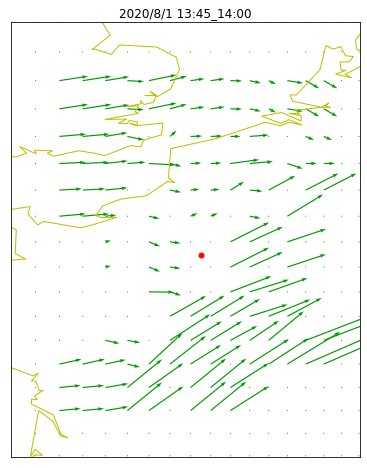

In [33]:
%matplotlib inline
show_CMV('202008011400',on_map=False);

In [12]:
np.unique(file_test[['CMV_X']].to_array().values)

array([-8.36, -7.84, -7.75, -7.2 , -6.94, -6.92, -6.67, -6.66, -6.48,
       -6.27, -5.05, -4.95, -4.88, -4.73, -4.56, -4.3 , -4.26, -4.15,
       -4.13, -3.94, -3.93, -3.89, -3.84, -3.6 , -3.51, -3.1 , -2.67,
       -2.44, -2.1 , -1.93, -1.81, -1.54, -1.18, -1.09, -1.07, -1.01,
       -0.99, -0.97, -0.88, -0.8 , -0.7 , -0.69, -0.55, -0.51, -0.4 ,
       -0.37, -0.33, -0.19, -0.18, -0.16, -0.14, -0.11, -0.07,  0.  ,
        0.02,  0.07,  0.2 ,  0.22,  0.24,  0.26,  0.3 ,  0.32,  0.33,
        0.39,  0.45,  0.56,  0.67,  0.76,  0.79,  0.8 ,  1.  ,  1.02,
        1.04,  1.08,  1.35,  1.62], dtype=float32)

In [14]:
# X_test_ae,Y_test,X_test=test_data(0,50,aecnn)
X_test_T0=file_test[['CAL_T0']].to_array().values
X_test_T015=file_test[['CAL_T0-15']].to_array().values
X_test_T0_ae=aecnn.predict(X_test_T0)
X_test_T015_ae=aecnn.predict(X_test_T015)

Y_test_x=file_test[['CMV_X']].to_array().values
Y_test_y=file_test[['CMV_Y']].to_array().values
X_test=np.empty((1,513,513,2,1))
Y_test=np.empty((1,513,513,2,1))
X_test[:,:,:,0,:]=X_test_T0_ae.reshape((-1,513,513,1))
X_test[:,:,:,1,:]=X_test_T015_ae.reshape((-1,513,513,1))
Y_test[:,:,:,0,:]=Y_test_x.reshape((-1,513,513,1))
Y_test[:,:,:,1,:]=Y_test_y.reshape((-1,513,513,1))
# X_test=X_test.reshape((1,513,513,2,1))
# Y_test=Y_test.reshape((1,513,513,2,1))

In [14]:
def show_CMV_x_y(cmv_x,cmv_y):
  
    lon_lat=xr.open_dataset('/net/nfs/ssd1/dbennour/lon_lat.nc')
    cmv_lon = lon_lat['lon'].values
    cmv_lat = lon_lat['lat'].values

    Cal_file=CAL_files()
    fig=plt.figure(figsize=(8,8))
    xs = 1095
    ys = 5722
    lat_lon_SIRTA = tr.pixel_to_lat_lon_HR(xs,ys)
    lat_SIRTA = lat_lon_SIRTA[0] 
    lon_SIRTA = lat_lon_SIRTA[1]
    lon=cmv_lon[:]
    lat=cmv_lat[:]
    Arrows = read_cmv(cmv_x,cmv_y,lon,lat)
    U = Arrows['dy']
    V = Arrows['dx']
    lon = Arrows['longitude']
    lat = Arrows['latitude']
    m = Basemap(llcrnrlon =cmv_lon.min(), llcrnrlat = cmv_lat.min(), urcrnrlon = cmv_lon.max(), urcrnrlat = cmv_lat.max(),lon_0=0.0,lat_0= 0, resolution='l')
    m.drawcoastlines(color = 'y',linewidth = 1.0)
#     return lon,cmv_lon
    x0, y0 = m(lon.min(), lat.min())
    x1, y1 = m(lon.max(), lat.max())
    extent = (x0, x1, y0, y1)
    X,Y = np.meshgrid(lon,lat)
    lons,lats = m(X,Y)
    if len(lons) > 0:
        q = m.quiver(lon,lat,U,-V,color=(0,0.6,0),angles='xy', scale_units='xy',scale=3)
    else:
        print("No vectors found")
    a, b = m(lon_SIRTA,lat_SIRTA)
    m.plot(a,b,marker='o',color='r',markersize=5)

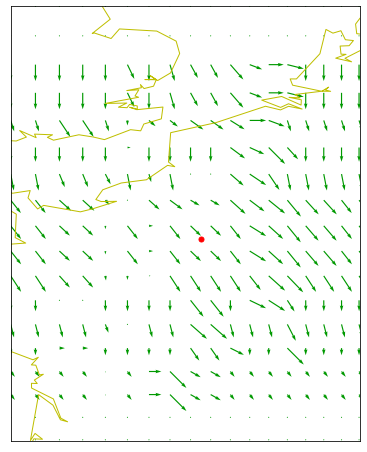

In [15]:
%matplotlib inline
Cal_file=CAL_files()
y1=Y_test[20,:,:,0,:].reshape((513,513))
y2=Y_test[20,:,:,1,:].reshape((513,513))
# cmv_x,cmv_y,cmv_lon,cmv_lat=Cal_file.Read_CMV_image('2016','01','01','1400','1415')
# cmv_x,cmv_y,cmv_lon,cmv_lat=cmv_x.values,cmv_y.values,cmv_lon.values,cmv_lat.values
show_CMV_x_y(y1,y2)



In [21]:
# Y_pred=model.predict(X_test)

Y_pred=model.predict(X_test[20,:,:,:,:])


ValueError: in user code:

    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:717 call
        return self._run_internal_graph(
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/layers/merge.py:183 call
        return self._merge_function(inputs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/layers/merge.py:522 _merge_function
        return K.concatenate(inputs, axis=self.axis)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:2709 concatenate
        return array_ops.concat([to_dense(x) for x in tensors], axis)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:180 wrapper
        return target(*args, **kwargs)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:1606 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:1188 concat_v2
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:593 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3319 _create_op_internal
        ret = Operation(
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1816 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /net/nfs/tools/anaconda/2020-11/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimension 2 in both shapes must be equal, but are 3 and 1. Shapes are [?,57,3,1] and [?,57,1,1]. for '{{node model/concatenate/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](model/conv3d_transpose/BiasAdd, model/leaky_re_lu_5/LeakyRelu, model/concatenate/concat/axis)' with input shapes: [?,57,3,1,40], [?,57,1,1,40], [] and with computed input tensors: input[2] = <4>.


In [15]:
np.unique(Y_pred[:,:,:,1,:])

array([0.11957422, 0.11995001, 0.12064111, ..., 0.5172576 , 0.52161974,
       0.53389233], dtype=float32)

In [11]:
Y_pred.shape

(50, 513, 513, 2, 1)

In [ ]:
%matplotlib inline
Cal_file=CAL_files()
y1=Y_pred[120,:,:,0,:].reshape((513,513))
y2=Y_pred[120,:,:,1,:].reshape((513,513))
# cmv_x,cmv_y,cmv_lon,cmv_lat=Cal_file.Read_CMV_image('2016','01','01','1400','1415')
# cmv_x,cmv_y,cmv_lon,cmv_lat=cmv_x.values,cmv_y.values,cmv_lon.values,cmv_lat.values
show_CMV_x_y(y1,y2)